<a href="https://colab.research.google.com/github/oransom48/PM2.5_Chiangmai/blob/main/PM25_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facebook Prophet time-series model for PM 2.5 prediction in Chiangmai**

youtube
*   การวิเคราะห์อนุกรมเวลา Time Series (ฝุ่น PM 2.5) ด้วย Facebook Prophet https://youtu.be/rNjMs3sn_QM
*   การวิเคราะห์อนุกรมเวลา Time Series (ฝุ่น PM 2.5) ด้วย Lightgbm regressor + SHAP https://youtu.be/COtinIQk12w


website
*   https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/
*   https://facebook.github.io/prophet/docs/quick_start.html

In [ ]:
import sys
import math
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pprint import pprint

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format='retina'
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(f'Python version: {sys.version}')
print(f'pandas version: {pd.__version__}')
print(f'numpy  version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pd.Timestamp.now()

Python version: 3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]
pandas version: 1.3.5
numpy  version: 1.21.5
seaborn version: 0.11.2


Timestamp('2022-04-07 16:11:39.759477')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read and preprocess data

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/datasci CMU/PM2.5_36T_CHIANGMAI.xlsx')
data

,Date,PM2.5
0,2011-01-01,NaN
1,2011-01-02,NaN
2,2011-01-03,NaN
3,2011-01-04,NaN
4,2011-01-05,NaN
...,...,...
3648,2020-12-27,26.0
3649,2020-12-28,19.0
3650,2020-12-29,17.0
3651,2020-12-30,23.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3653 non-null   datetime64[ns]
 1   PM2.5   3331 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [ ]:
data.describe()

,PM2.5
count,3331.000000
mean,29.271690
std,25.763017
min,3.000000
25%,13.000000
50%,20.000000
75%,36.000000
max,266.000000


In [ ]:
data=data.sort_values('Date').reset_index(drop=True).copy()
data

,Date,PM2.5
0,2011-01-01,NaN
1,2011-01-02,NaN
2,2011-01-03,NaN
3,2011-01-04,NaN
4,2011-01-05,NaN
...,...,...
3648,2020-12-27,26.0
3649,2020-12-28,19.0
3650,2020-12-29,17.0
3651,2020-12-30,23.0


In [ ]:
y_col='PM2.5'

In [ ]:
data.dropna(subset=[y_col], inplace=True)
data.columns=['ds', 'y']
data

,ds,y
136,2011-05-17,3.0
137,2011-05-18,12.0
138,2011-05-19,13.0
139,2011-05-20,19.0
140,2011-05-21,22.0
...,...,...
3648,2020-12-27,26.0
3649,2020-12-28,19.0
3650,2020-12-29,17.0
3651,2020-12-30,23.0


In [ ]:
data.describe()

,y
count,3331.000000
mean,29.271690
std,25.763017
min,3.000000
25%,13.000000
50%,20.000000
75%,36.000000
max,266.000000


### visualize data

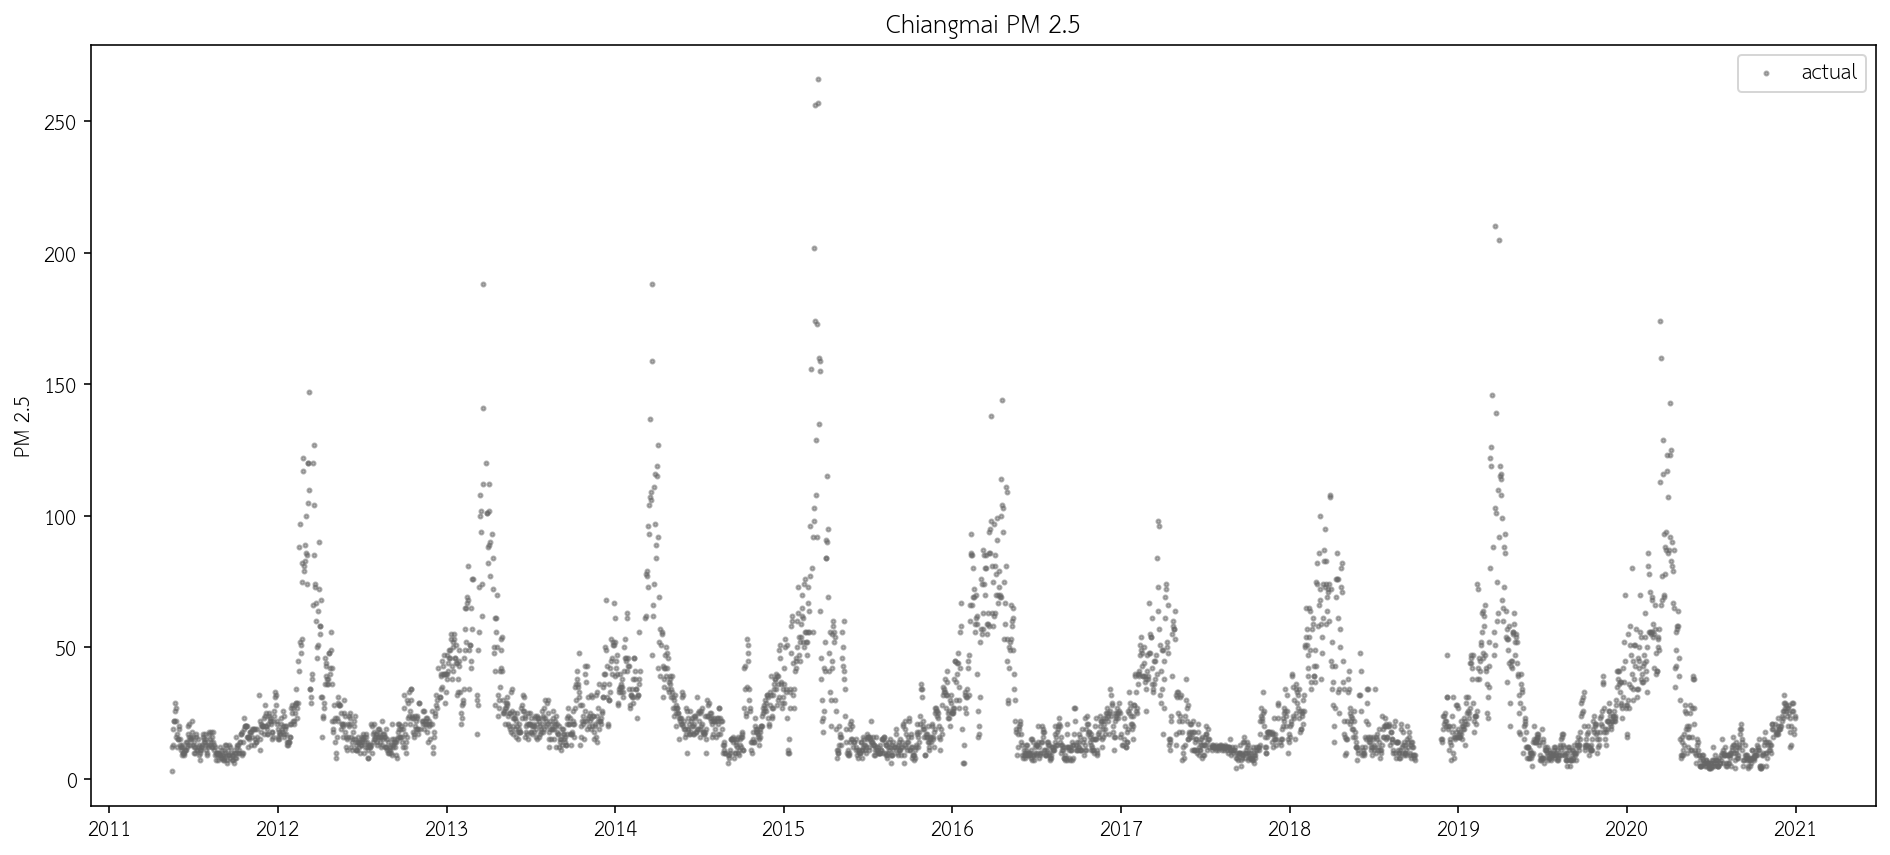

In [ ]:
plt.figure(figsize=(16,7))
plt.scatter(data['ds'], data['y'], alpha=.5, s=4, label='actual', color='.4')
plt.ylabel('PM 2.5')
plt.title("Chiangmai PM 2.5")
plt.legend();

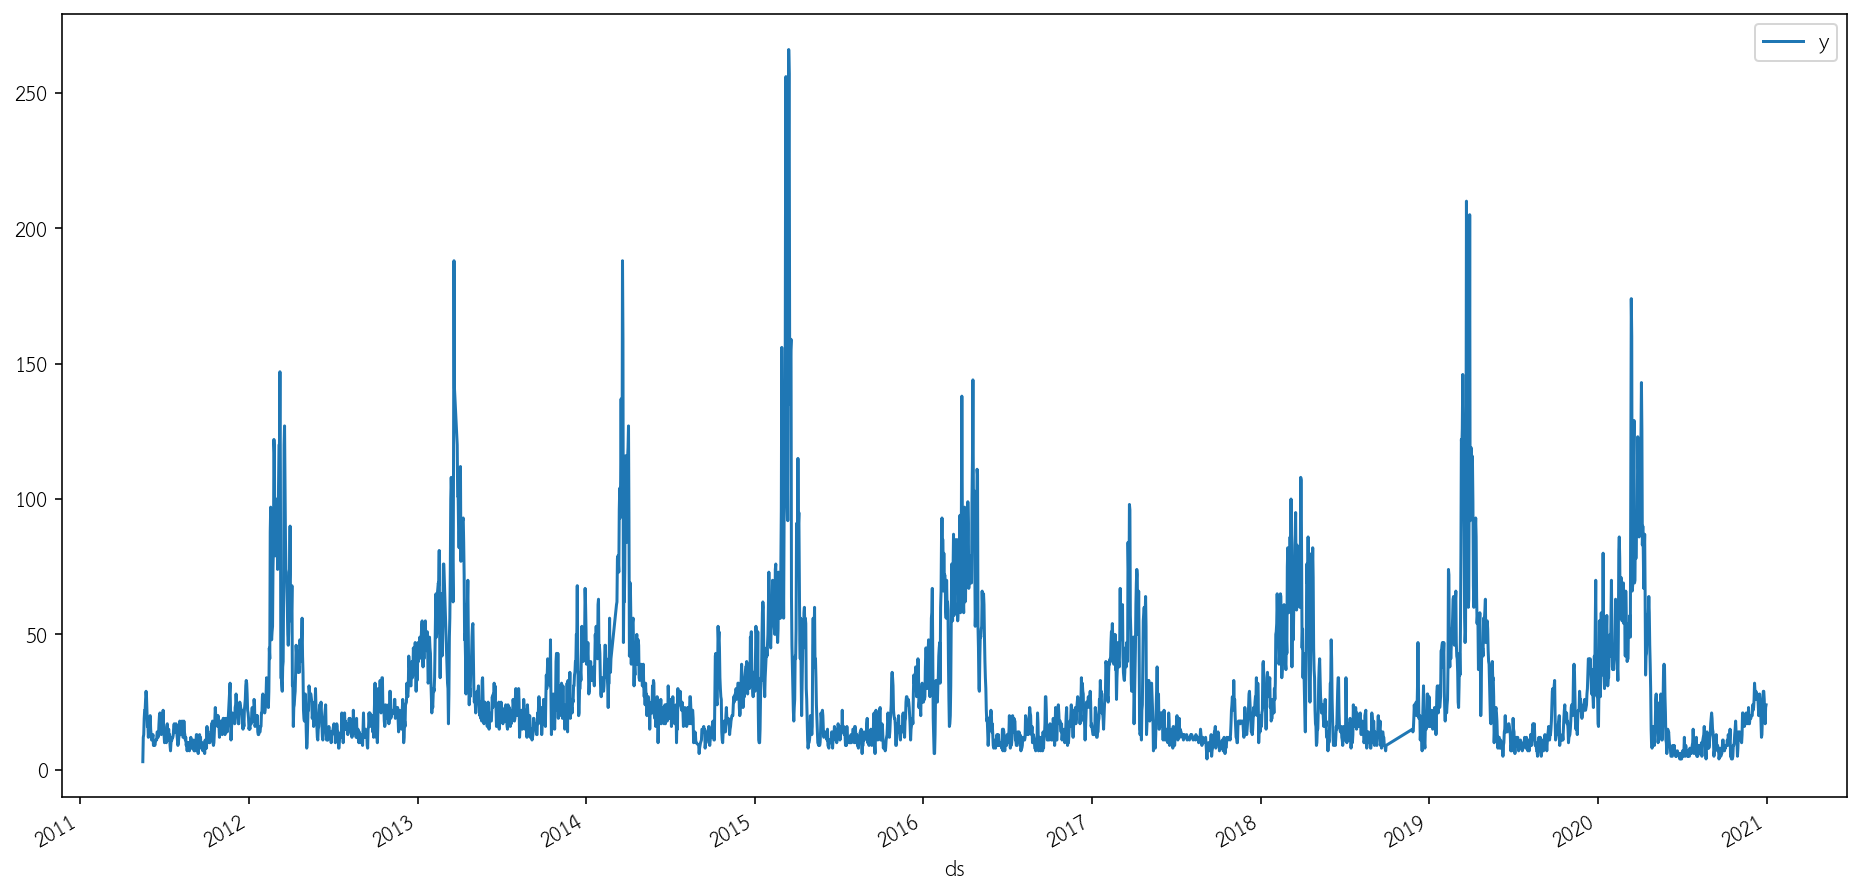

In [ ]:
data.set_index('ds').plot(figsize=(16,8));

## Time series forecast with facebook prophet

In [ ]:
from fbprophet import Prophet

In [ ]:
model = Prophet()

In [ ]:
model.__dict__

{'changepoint_prior_scale': 0.05,
 'changepoint_range': 0.8,
 'changepoints': None,
 'changepoints_t': None,
 'component_modes': None,
 'country_holidays': None,
 'daily_seasonality': 'auto',
 'extra_regressors': OrderedDict(),
 'fit_kwargs': {},
 'growth': 'linear',
 'history': None,
 'history_dates': None,
 'holidays': None,
 'holidays_prior_scale': 10.0,
 'interval_width': 0.8,
 'logistic_floor': False,
 'mcmc_samples': 0,
 'n_changepoints': 25,
 'params': {},
 'seasonalities': OrderedDict(),
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 10.0,
 'specified_changepoints': False,
 'stan_backend': <fbprophet.models.PyStanBackend at 0x7f4edb2a1d50>,
 'stan_fit': None,
 'start': None,
 't_scale': None,
 'train_component_cols': None,
 'train_holiday_names': None,
 'uncertainty_samples': 1000,
 'weekly_seasonality': 'auto',
 'y_scale': None,
 'yearly_seasonality': 'auto'}

In [ ]:
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## visualize forecast

### future dataframe

In [ ]:
future = model.make_future_dataframe(periods=365, freq='D')
future.tail()

,ds
3691,2021-12-27
3692,2021-12-28
3693,2021-12-29
3694,2021-12-30
3695,2021-12-31


In [ ]:
future.head()

,ds
0,2011-05-17
1,2011-05-18
2,2011-05-19
3,2011-05-20
4,2011-05-21


In [ ]:
forecast = model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-05-17,24.891829,-1.777144,37.462652,24.891829,24.891829,-6.919828,-6.919828,-6.919828,-0.320907,-0.320907,-0.320907,-6.598921,-6.598921,-6.598921,0.0,0.0,0.0,17.972001
1,2011-05-18,24.903048,-3.320080,37.567551,24.903048,24.903048,-7.247222,-7.247222,-7.247222,-0.025787,-0.025787,-0.025787,-7.221435,-7.221435,-7.221435,0.0,0.0,0.0,17.655826
2,2011-05-19,24.914267,-3.120327,36.680132,24.914267,24.914267,-7.492552,-7.492552,-7.492552,0.313149,0.313149,0.313149,-7.805701,-7.805701,-7.805701,0.0,0.0,0.0,17.421715
3,2011-05-20,24.925486,-0.375985,34.304113,24.925486,24.925486,-7.761561,-7.761561,-7.761561,0.590116,0.590116,0.590116,-8.351677,-8.351677,-8.351677,0.0,0.0,0.0,17.163925
4,2011-05-21,24.936705,-3.990149,34.631540,24.936705,24.936705,-8.773926,-8.773926,-8.773926,0.086015,0.086015,0.086015,-8.859941,-8.859941,-8.859941,0.0,0.0,0.0,16.162779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,2021-12-27,26.643071,5.055906,47.920277,25.010988,28.166200,0.371587,0.371587,0.371587,0.013352,0.013352,0.013352,0.358235,0.358235,0.358235,0.0,0.0,0.0,27.014659
3692,2021-12-28,26.639685,7.060334,46.367315,25.000764,28.171058,0.248874,0.248874,0.248874,-0.320907,-0.320907,-0.320907,0.569781,0.569781,0.569781,0.0,0.0,0.0,26.888559
3693,2021-12-29,26.636299,8.613495,48.048441,24.999680,28.173678,0.727634,0.727634,0.727634,-0.025787,-0.025787,-0.025787,0.753421,0.753421,0.753421,0.0,0.0,0.0,27.363934
3694,2021-12-30,26.632913,8.848166,47.760384,24.998642,28.176318,1.219690,1.219690,1.219690,0.313149,0.313149,0.313149,0.906541,0.906541,0.906541,0.0,0.0,0.0,27.852603


In [ ]:
dfcst = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dfcst

,ds,yhat,yhat_lower,yhat_upper
0,2011-05-17,17.972001,-1.777144,37.462652
1,2011-05-18,17.655826,-3.320080,37.567551
2,2011-05-19,17.421715,-3.120327,36.680132
3,2011-05-20,17.163925,-0.375985,34.304113
4,2011-05-21,16.162779,-3.990149,34.631540
...,...,...,...,...
3691,2021-12-27,27.014659,5.055906,47.920277
3692,2021-12-28,26.888559,7.060334,46.367315
3693,2021-12-29,27.363934,8.613495,48.048441
3694,2021-12-30,27.852603,8.848166,47.760384


In [ ]:
dt = pd.merge(data, dfcst, left_on='ds', right_on='ds')
dt

,ds,y,yhat,yhat_lower,yhat_upper
0,2011-05-17,3.0,17.972001,-1.777144,37.462652
1,2011-05-18,12.0,17.655826,-3.320080,37.567551
2,2011-05-19,13.0,17.421715,-3.120327,36.680132
3,2011-05-20,19.0,17.163925,-0.375985,34.304113
4,2011-05-21,22.0,16.162779,-3.990149,34.631540
...,...,...,...,...,...
3326,2020-12-27,26.0,27.636603,7.842540,45.445787
3327,2020-12-28,19.0,28.507357,8.964926,48.983107
3328,2020-12-29,17.0,28.345942,8.848039,49.588553
3329,2020-12-30,23.0,28.782837,8.231664,47.457008


### plot actual and forecast

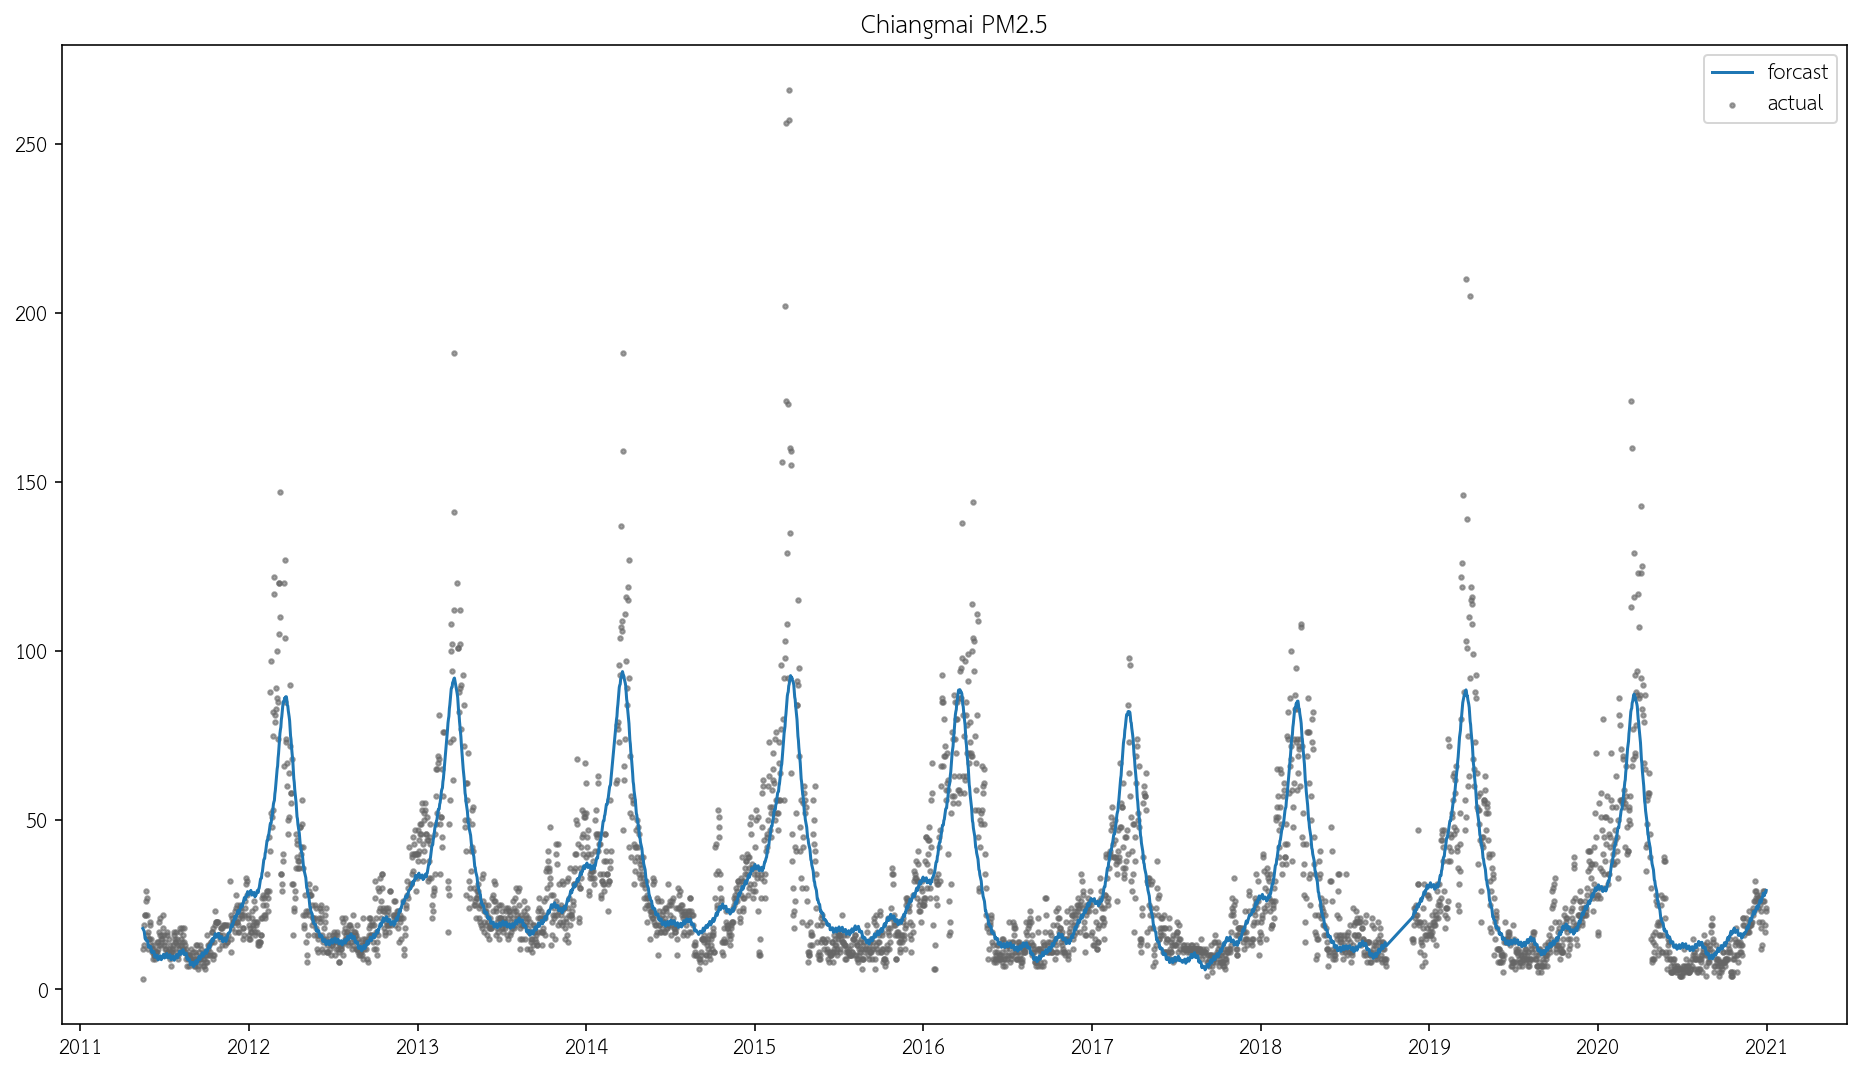

In [ ]:
plt.figure(figsize=(16,9))
plt.scatter(dt['ds'], dt['y'], color='.4', label='actual', s=5, alpha=.6)
plt.plot(dt['ds'], dt['yhat'], label='forcast')
plt.title(f'Chiangmai {y_col}')
plt.legend();

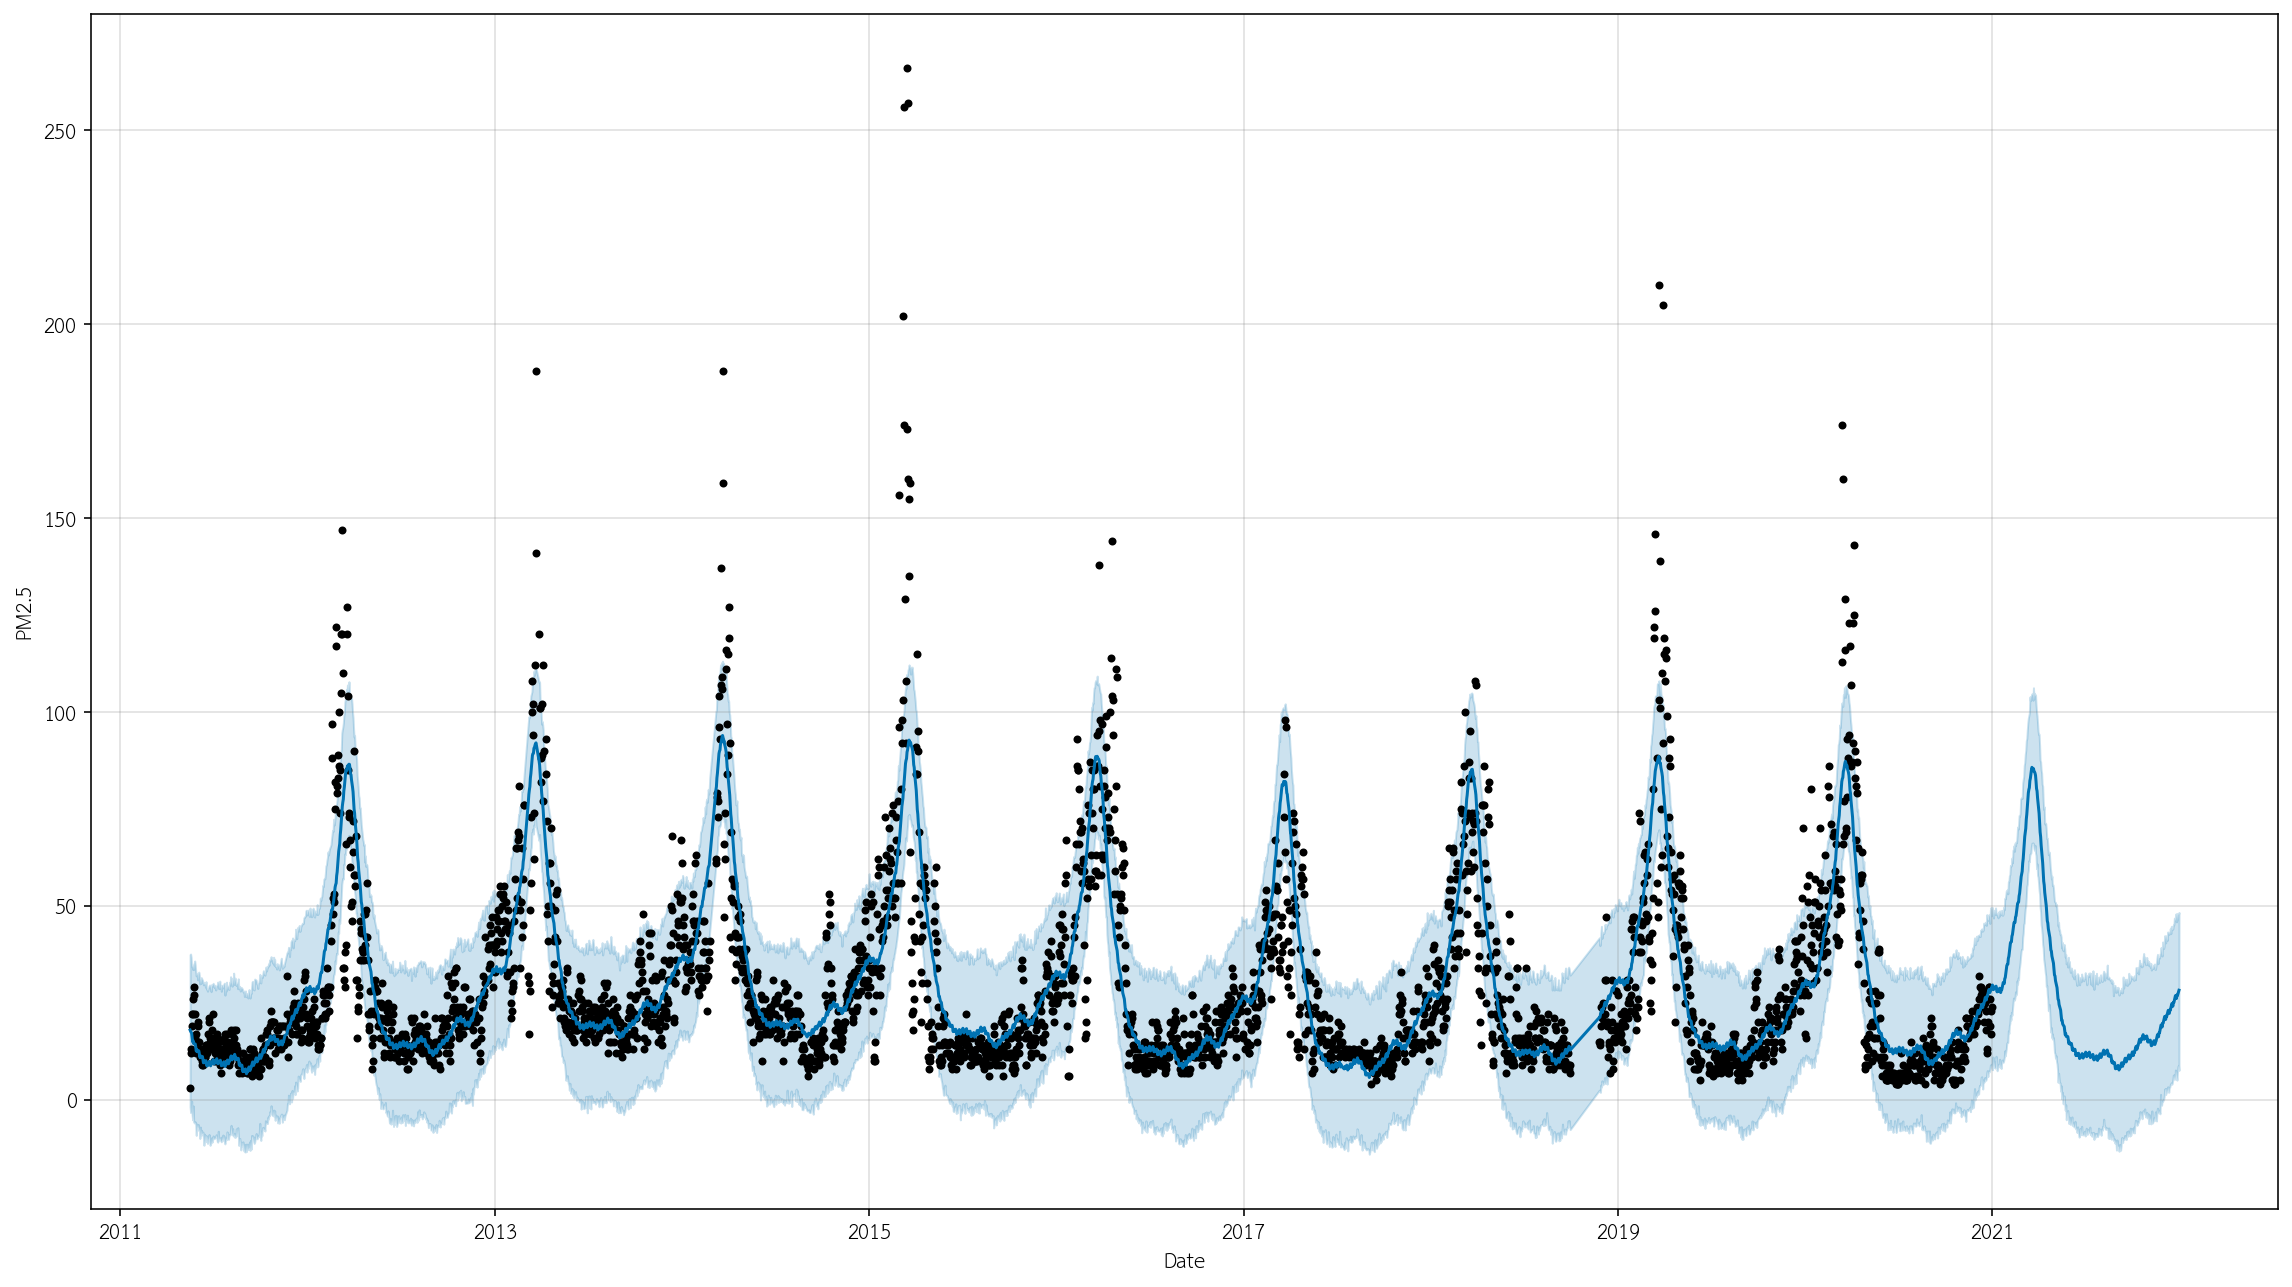

In [ ]:
fig=model.plot(forecast, uncertainty=True, figsize=(16,9), xlabel='Date', ylabel=y_col)

### plot weekly and yearly trend

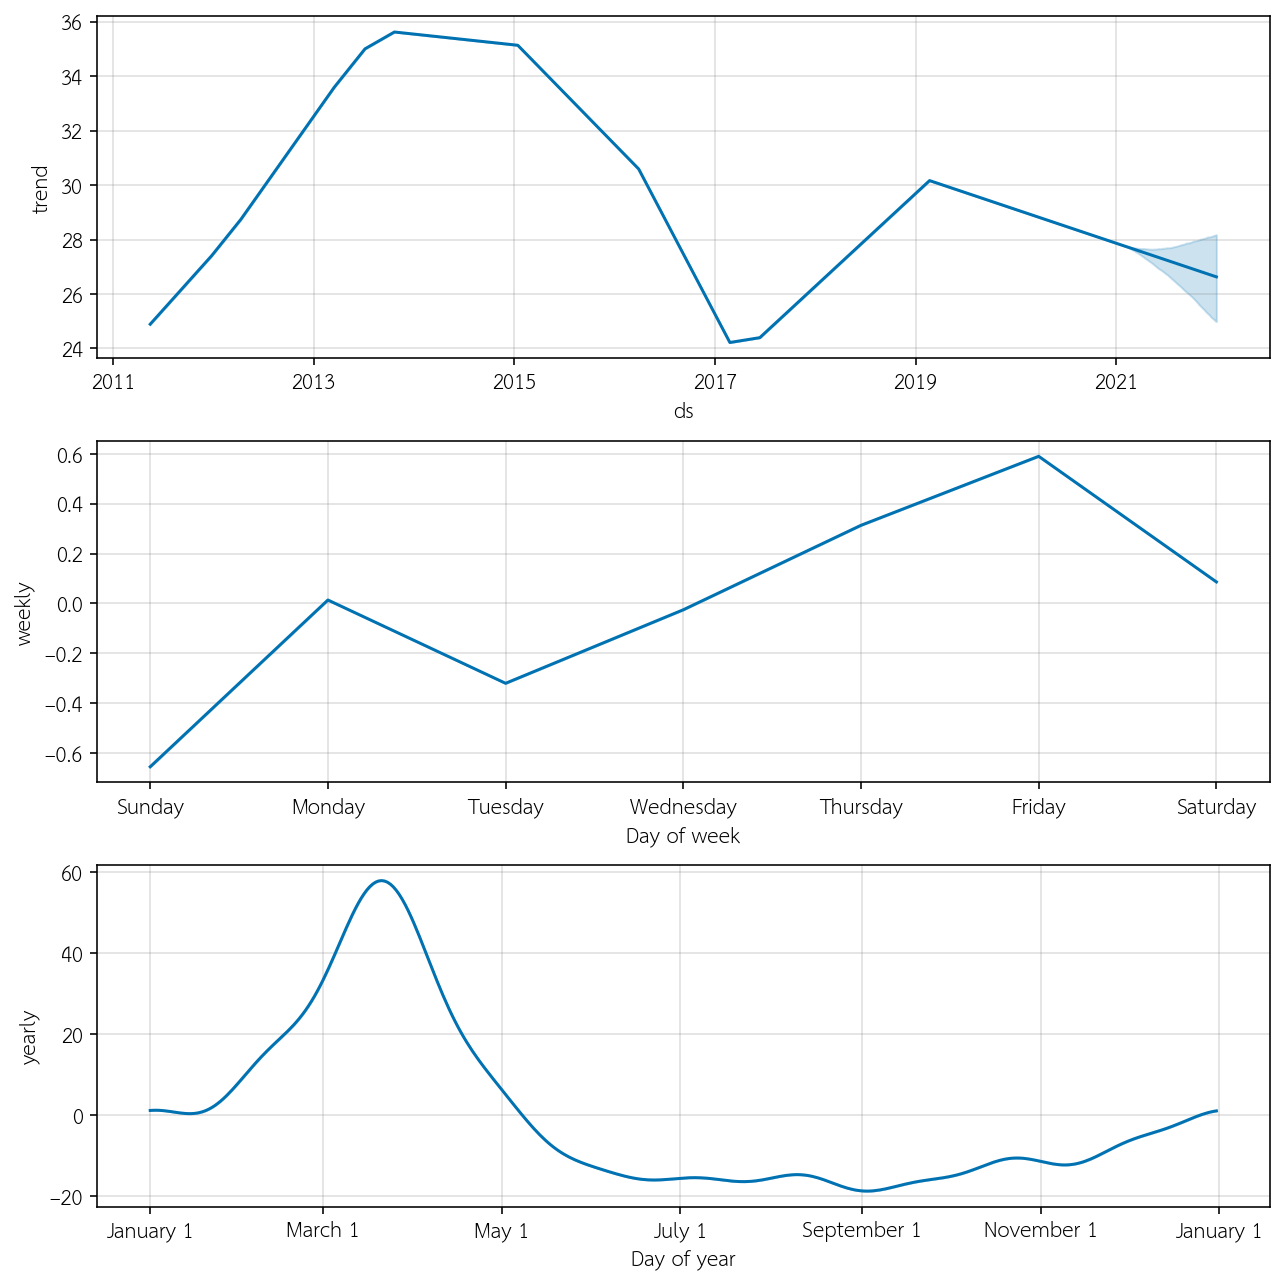

In [ ]:
fig=model.plot_components(forecast)

## Evaluate

### table

https://facebook.github.io/prophet/docs/diagnostics.html#cross-validation

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model,  initial='2974 days', period = '180 days', horizon = '366 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-12-31 00:00:00 and 2019-12-31 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-01-01,33.144888,11.871953,52.493589,28.0,2019-12-31
1,2020-01-02,33.560294,16.095166,54.081897,17.0,2019-12-31
2,2020-01-03,33.484188,13.596854,52.476276,16.0,2019-12-31
3,2020-01-04,32.631798,13.068326,53.275926,30.0,2019-12-31
4,2020-01-05,31.468763,11.102977,49.166048,55.0,2019-12-31


In [ ]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
352,2020-12-27,34.490414,14.797233,54.657946,26.0,2019-12-31
353,2020-12-28,35.563834,15.934293,54.653398,19.0,2019-12-31
354,2020-12-29,35.733584,15.783108,54.647096,17.0,2019-12-31
355,2020-12-30,36.123156,16.754448,57.176423,23.0,2019-12-31
356,2020-12-31,36.591391,17.602749,58.514295,24.0,2019-12-31


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days,253.715572,15.928452,12.034290,0.276668,0.247971,0.828571
1,37 days,253.011464,15.906334,11.925902,0.272316,0.247971,0.828571
2,38 days,245.216056,15.659376,11.486606,0.245253,0.224644,0.828571
3,39 days,236.568847,15.380795,11.036911,0.215092,0.188737,0.828571
4,40 days,245.604793,15.671783,11.475355,0.220739,0.224644,0.828571
...,...,...,...,...,...,...,...
318,362 days,77.244306,8.788874,7.392282,0.378519,0.303057,0.942857
319,363 days,83.822320,9.155453,7.675733,0.392262,0.303057,0.942857
320,364 days,93.744167,9.682157,8.156150,0.421363,0.311191,0.942857
321,365 days,97.851190,9.891976,8.378644,0.430043,0.320738,0.942857


In [ ]:
df_p.mean()

horizon     199 days 07:21:21.733746130
mse                          278.344864
rmse                           15.00401
mae                           12.752763
mape                           1.008722
mdape                          0.822504
coverage                       0.857408
dtype: object

### plot from cross-validation metric

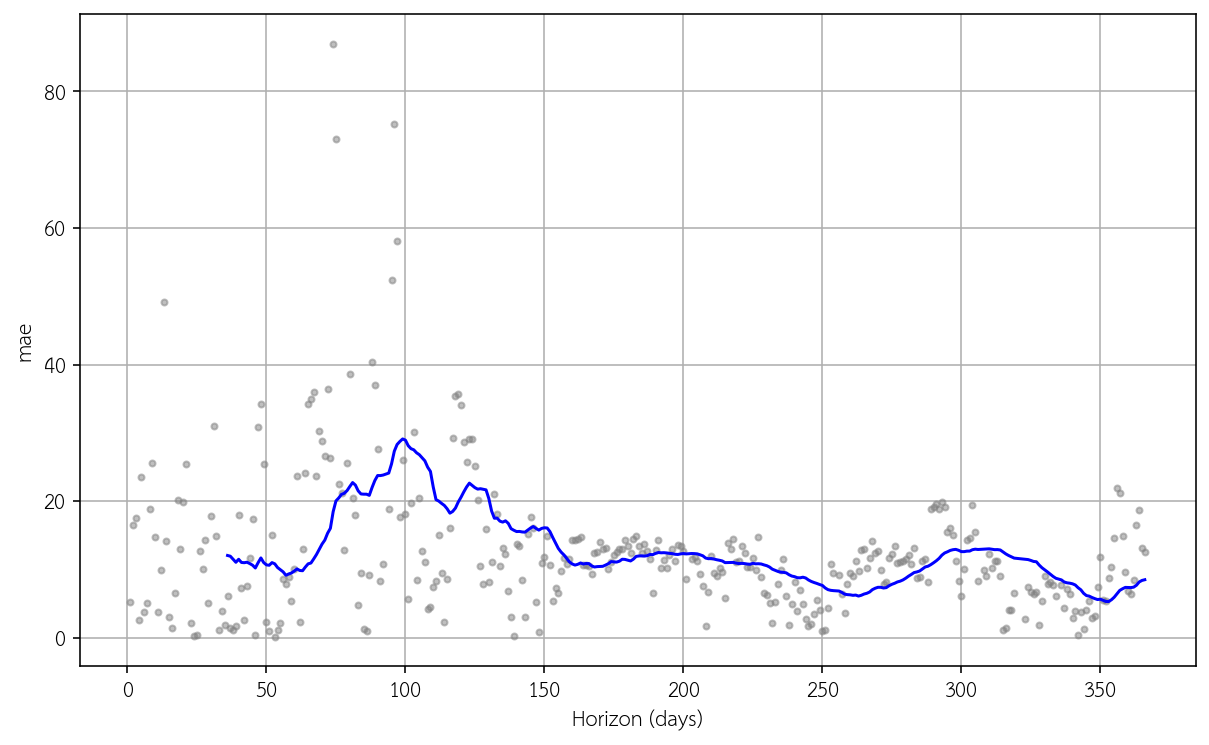

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

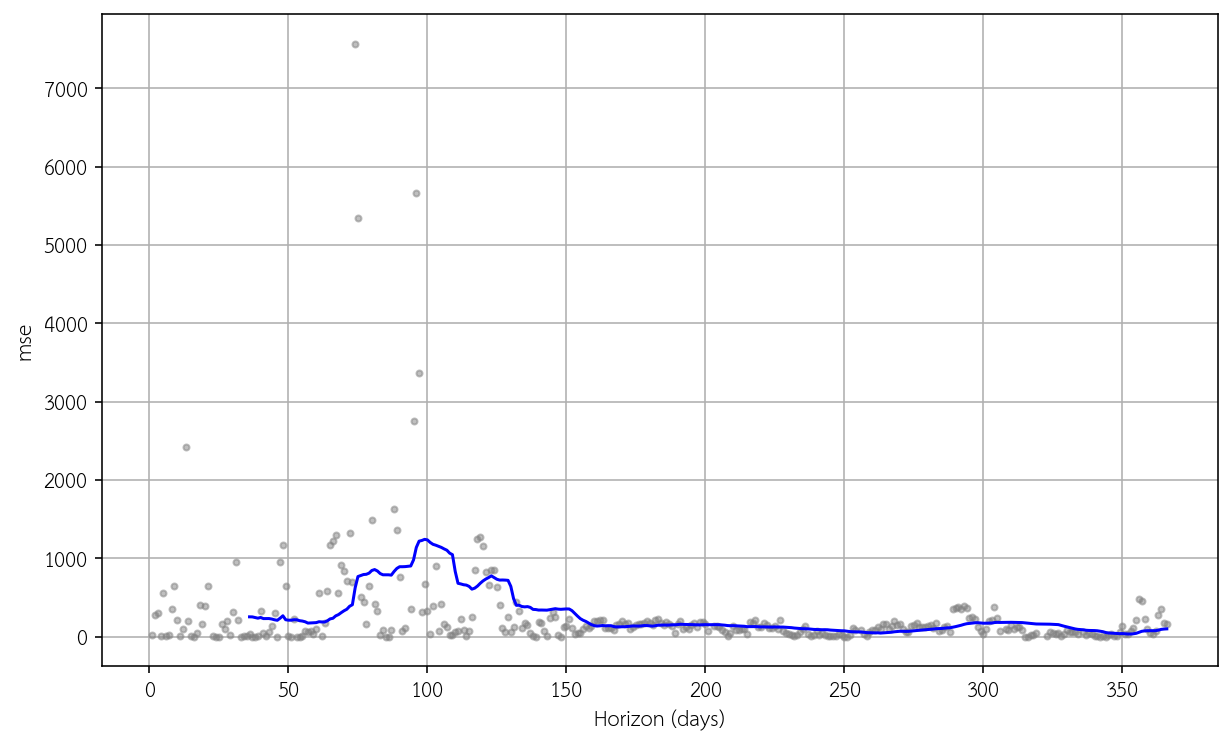

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mse')

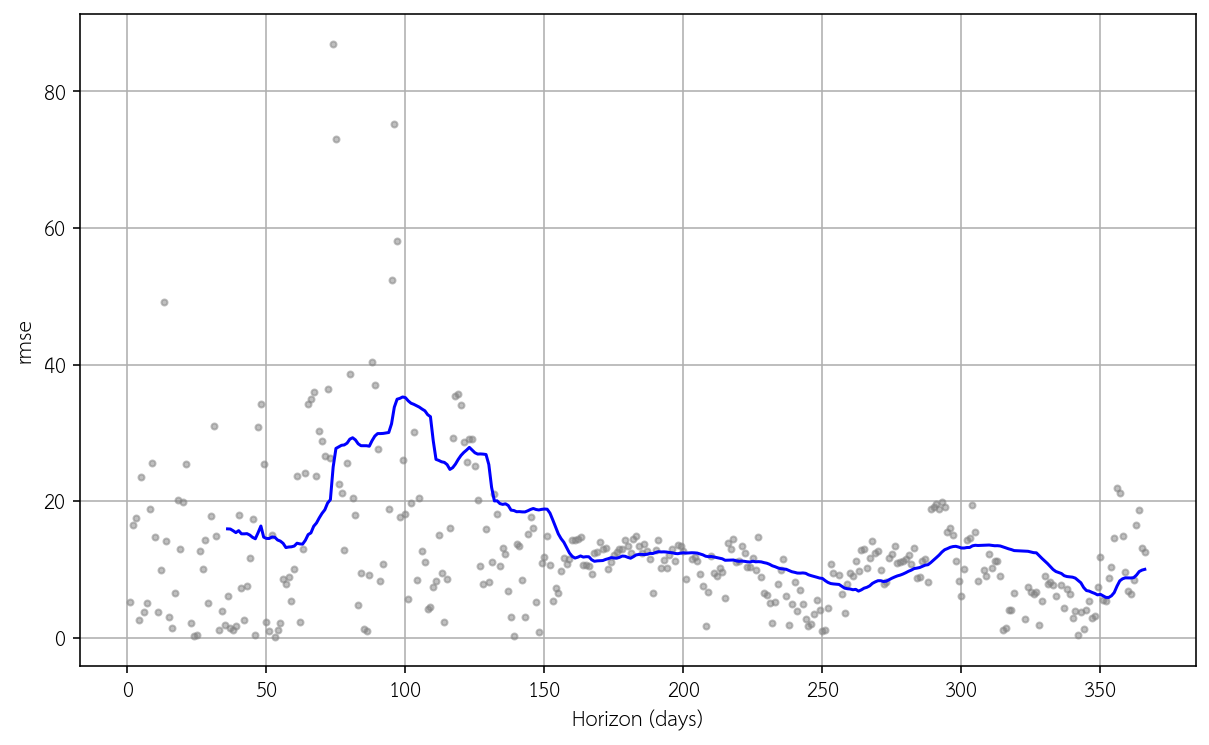

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

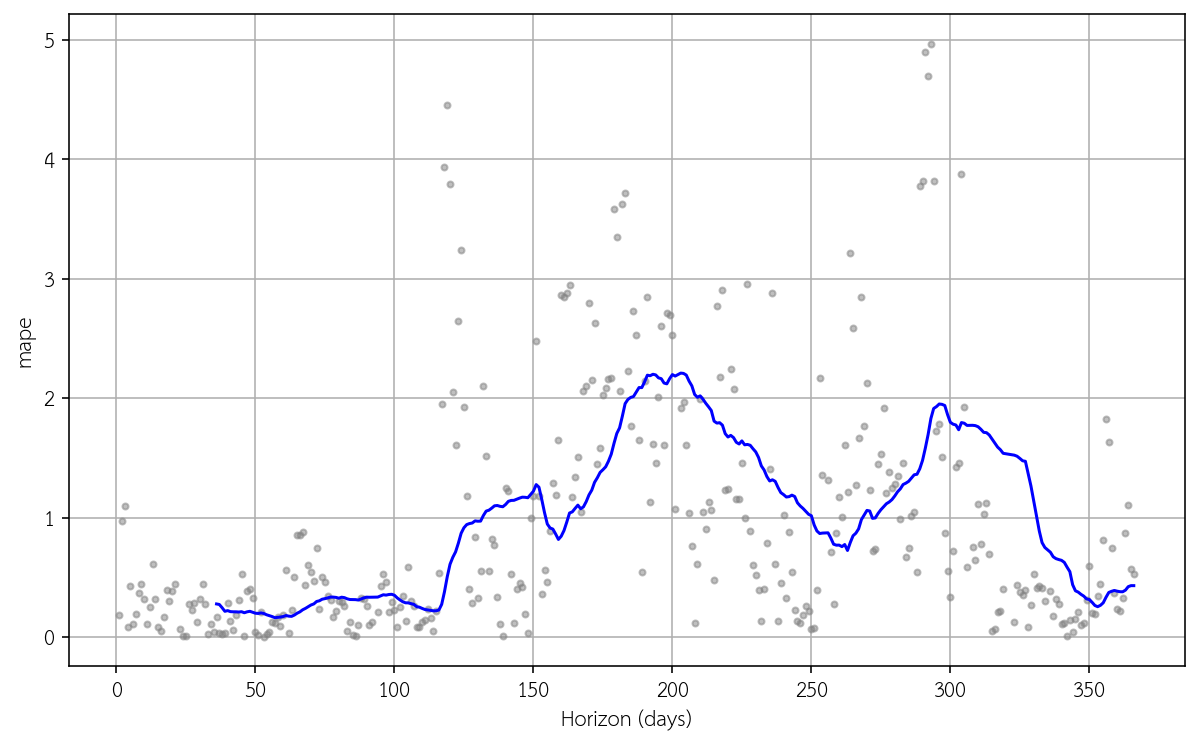

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

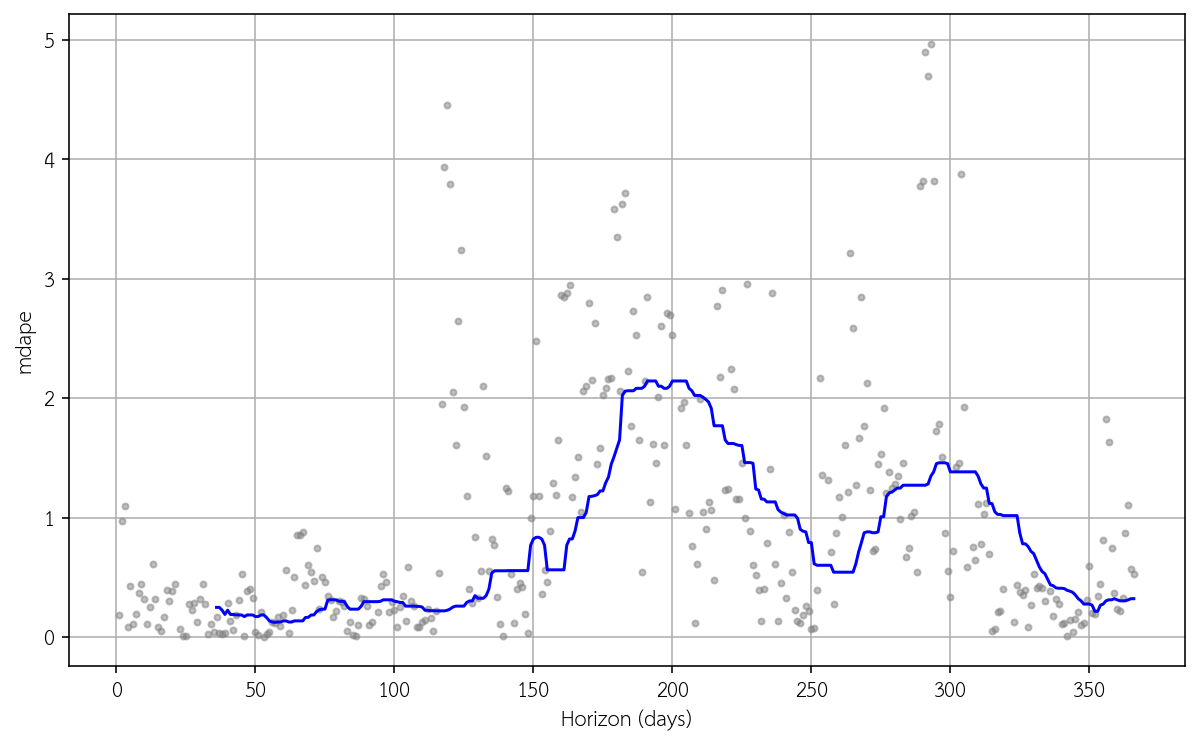

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mdape')

## Save model

In [ ]:
'''
import json
from fbprophet.serialize import model_to_json, model_from_json

with open('/content/drive/MyDrive/datasci CMU/model/prophet_model1.json', 'w') as fout:
    json.dump(model_to_json(model), fout)  # Save model'''

"\nimport json\nfrom fbprophet.serialize import model_to_json, model_from_json\n\nwith open('/content/drive/MyDrive/datasci CMU/model/prophet_model1.json', 'w') as fout:\n    json.dump(model_to_json(model), fout)  # Save model"

In [ ]:
'''
with open('/content/drive/MyDrive/datasci CMU/model/prophet_model1.json', 'r') as fin:
    model = model_from_json(json.load(fin))  # Load model
'''

"\nwith open('/content/drive/MyDrive/datasci CMU/model/prophet_model1.json', 'r') as fin:\n    model = model_from_json(json.load(fin))  # Load model\n"

In [ ]:
#dt.to_excel("PM25forecasting.xlsx")